<a href="https://colab.research.google.com/github/athulrj02/TwiPipeline/blob/main/DA%7CCA_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Athul Raj

**20035410**

In [ ]:
# !pip install tweepy pandas

In [ ]:
import yaml
import requests
import pandas as pd
import json
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loading configration file(process_yaml)

In [ ]:
def process_yaml(file_path):
  with open(file_path, 'r') as file:
    return yaml.safe_load(file)

In [ ]:
config_path = '/content/drive/My Drive/Colab Notebooks/config.yaml'
config = process_yaml(config_path)

In [ ]:
# create berarer token
def create_bearer_token(config):
  return config['BEARER_TOKEN']# extarcting the bearer token from config
bearer_token = create_bearer_token(config)

In [ ]:
# headers
def create_headers(bearer_token):
  return{"Authorization": f"Bearer {bearer_token}"}
headers = create_headers(bearer_token)

In [ ]:
# url for querying twitter api
def create_url(keyword, max_results = 100):
  url = (
      f"https://api.twitter.com/2/tweets/search/recent"
      f"?query={keyword} -is:retweet lang:en"
      f"&max_results={max_results}&tweet.fields=created_at,author_id,text,public_metrics"
      )
  return url

In [ ]:
# connecting the endpoint & fetching data
def connect_to_endpoint(url, headers):
  response = requests.get(url, headers=headers)
  if response.status_code !=200:
    raise Exception(f"Request failed with status code {response.status_code}: {response.text}")
  return response.json()

In [ ]:
# function to query twitter api and save json file
def main():
  keyword = "cyber security"
  url = create_url(keyword)
  json_response = connect_to_endpoint(url, headers)

  # formatted json
  print(json.dumps(json_response, indent=4, sort_keys=True))
  # storing json response in drive
  output_json_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.json'
  with open(output_json_path, "w") as json_file:
    json.dump(json_response, json_file)
  print(f"JSON response saved to {output_json_path}")
  # saving tweets as csv
  tweets_data = []
  for  tweet in json_response.get('data', []):
    tweets_data.append({
        "created_at": tweet["created_at"],
        "author_id": tweet["author_id"],
        "text": tweet["text"],
        "retweet_count": tweet["public_metrics"]["retweet_count"],
        "like_count": tweet["public_metrics"]["like_count"],
        "reply_count": tweet["public_metrics"]["reply_count"]
    })
  output_csv_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv'
  df = pd.DataFrame(tweets_data)
  df.to_csv(output_csv_path, index=False)

In [ ]:
main()

{
    "data": [
        {
            "author_id": "603555929",
            "created_at": "2024-11-24T03:14:19.000Z",
            "edit_history_tweet_ids": [
                "1860522308130984067"
            ],
            "id": "1860522308130984067",
            "public_metrics": {
                "bookmark_count": 0,
                "impression_count": 0,
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "@higoodbyes You should report this case to a professional dev @Of_Harry01 he is a very good recovery agent, I'm sure you have a high chance of recovery with him. He is a cyber security expert and a good recovery agent here on twitter. I'm sure he will help you recover your funds."
        },
        {
            "author_id": "1687906840930029568",
            "created_at": "2024-11-24T03:13:54.000Z",
            "edit_history_tweet_ids": [
                "186052

In [ ]:
csv_path = "/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv"

In [ ]:
df=pd.read_csv(csv_path)

In [ ]:
df.head()

,created_at,author_id,text,retweet_count,like_count,reply_count
0,2024-11-24T03:14:19.000Z,603555929,@higoodbyes You should report this case to a p...,0,0,0
1,2024-11-24T03:13:54.000Z,1687906840930029568,We are available to attend to all your cyber s...,0,0,0
2,2024-11-24T03:13:11.000Z,1311871963002937344,@TimHannan there should be a forensic review a...,0,0,0
3,2024-11-24T03:12:45.000Z,379110780,@bijaysenihang Cyber security needs to be upgr...,0,0,0
4,2024-11-24T03:10:24.000Z,1858528083634233344,@higoodbyes @higoodbyes Why not reach out to a...,0,0,0


In [ ]:
df.tail()

,created_at,author_id,text,retweet_count,like_count,reply_count
94,2024-11-24T01:59:32.000Z,1478544825641144322,"@sarlesachin Absolutely! In the digital age, s...",0,0,0
95,2024-11-24T01:59:22.000Z,1668983874,"@JerasIkehorn See @Spoonamore , an interview w...",0,0,0
96,2024-11-24T01:59:14.000Z,1856498381666869248,𝐔𝐒 𝐂𝐲𝐛𝐞𝐫 𝐄𝐬𝐩𝐢𝐨𝐧𝐚𝐠𝐞 𝐂𝐚𝐦𝐩𝐚𝐢𝐠𝐧 𝐓𝐚𝐫𝐠𝐞𝐭𝐞𝐝 𝐓𝐞𝐥𝐞𝐜𝐨𝐦𝐬 ...,0,0,0
97,2024-11-24T01:59:07.000Z,1703357293,@cnktNFT I've been in a similar situation befo...,0,0,0
98,2024-11-24T01:58:26.000Z,1849875716864937984,@vanesssitaaaaa Girl your crazy 🤣😧... your bio...,0,0,0


In [ ]:
from google.colab import files
files.download(csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_________________________________________

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
csv_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv'
df = pd.read_csv(csv_path)

In [3]:
df.head()

,created_at,author_id,text,retweet_count,like_count,reply_count
0,2024-11-24T03:14:19.000Z,603555929,@higoodbyes You should report this case to a p...,0,0,0
1,2024-11-24T03:13:54.000Z,1687906840930029568,We are available to attend to all your cyber s...,0,0,0
2,2024-11-24T03:13:11.000Z,1311871963002937344,@TimHannan there should be a forensic review a...,0,0,0
3,2024-11-24T03:12:45.000Z,379110780,@bijaysenihang Cyber security needs to be upgr...,0,0,0
4,2024-11-24T03:10:24.000Z,1858528083634233344,@higoodbyes @higoodbyes Why not reach out to a...,0,0,0


In [4]:
len(df)

99

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     99 non-null     object
 1   author_id      99 non-null     int64 
 2   text           99 non-null     object
 3   retweet_count  99 non-null     int64 
 4   like_count     99 non-null     int64 
 5   reply_count    99 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
df.describe()

,author_id,retweet_count,like_count,reply_count
count,9.900000e+01,99.000000,99.000000,99.000000
mean,8.860063e+17,0.030303,0.121212,0.010101
std,8.646752e+17,0.223814,0.500464,0.100504
min,1.629658e+07,0.000000,0.000000,0.000000
25%,2.186366e+09,0.000000,0.000000,0.000000
50%,1.311872e+18,0.000000,0.000000,0.000000
75%,1.823403e+18,0.000000,0.000000,0.000000
max,1.858528e+18,2.000000,4.000000,1.000000


In [7]:
df.isnull().sum()

,0
created_at,0
author_id,0
text,0
retweet_count,0
like_count,0
reply_count,0


In [8]:
df.duplicated().sum()

0

**Preprocessing**

Includes:
* Removing noises such as URL's, special Characters, whitespaces
* Normalizing
* Word tokenization
* Removing stopwords(the, and, etc..)
* Lemmatization

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def preprocess_tweet(text):
  #removing urls
  text =re.sub(r'http\S+|www\S+|https\S+','', text, flags = re.MULTILINE)

  #removing unwantedd special characters and nums
  text = re.sub(r'\@\w+|\#','',text)
  text = re.sub(r'[^A-Za-z\s]','',text)

  # convert into lowercase
  text = text.lower().strip()
  return text
# apply cleaning
df['cleaned_text']= df['text'].apply(preprocess_tweet)

In [12]:
df['cleaned_text']

,cleaned_text
0,you should report this case to a professional ...
1,we are available to attend to all your cyber s...
2,there should be a forensic review and a hand r...
3,cyber security needs to be upgraded pronto to ...
4,why not reach out to a professional cyber secu...
...,...
94,absolutely in the digital age staying vigilant...
95,see an interview with him on thom hartman yo...
96,cnn reports that top telecom executives met wi...
97,ive been in a similar situation before reporti...


In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
# tokenization
df['tokens']= df['cleaned_text'].apply(word_tokenize)

In [15]:
# stopwords removing
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [16]:
# lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [17]:
# saving cleaned data
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df.to_csv(cleaned_file_path, index=False)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df = pd.read_csv(cleaned_file_path)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   created_at         99 non-null     object
 1   author_id          99 non-null     int64 
 2   text               99 non-null     object
 3   retweet_count      99 non-null     int64 
 4   like_count         99 non-null     int64 
 5   reply_count        99 non-null     int64 
 6   cleaned_text       99 non-null     object
 7   tokens             99 non-null     object
 8   filtered_tokens    99 non-null     object
 9   lemmatized_tokens  99 non-null     object
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [19]:
df.shape

(99, 10)

In [21]:
df['cleaned_text'].describe()

,cleaned_text
count,99
unique,50
top,ill advise you reach out to on instagram hes ...
freq,27


In [22]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.6 MB/s eta 0:00:00


In [23]:
import emoji

In [24]:
#
slang_dict ={
    "u": "you",
    "r": "are",
    "lol": "laugh out loud",
    "idk": "I don't know",
    "btw": "by the way",
    "omg": "oh my god",
    "brb": "be right back",
    "ty": "thank you",
    "np": "no problem",
    "smh": "shaking my head",
    "lmao": "laughing my a** off"
}
# replace emojis with text
def replace_emojis(text):
  return emoji.demojize(text, delimiters=(" "," "))
# expand slang terms
def expand_slang(text, slang_dict):
  words = text.split()
  expanded_words = [slang_dict.get(word.lower, word) for word in words]
  return " ".join(expanded_words)

def advanced_cleaning(text):
  text = replace_emojis(text)
  text = expand_slang(text, slang_dict)
  return text
# updated df
df['cleaned_text_v2']= df['cleaned_text'].apply(advanced_cleaning)

In [25]:
print('DataFrame after advanced cleaning:')
print(df['cleaned_text_v2'])

DataFrame after advanced cleaning:
0     you should report this case to a professional ...
1     we are available to attend to all your cyber s...
2     there should be a forensic review and a hand r...
3     cyber security needs to be upgraded pronto to ...
4     why not reach out to a professional cyber secu...
                            ...                        
94    absolutely in the digital age staying vigilant...
95    see an interview with him on thom hartman yout...
96    cnn reports that top telecom executives met wi...
97    ive been in a similar situation before reporti...
98    girl your crazy your bio reads cyber security ...
Name: cleaned_text_v2, Length: 99, dtype: object


In [26]:
sample_text = df['cleaned_text'][10]
sample_output = df['cleaned_text_v2'][10]
print(sample_text,'\n')
print(sample_output)

ill advise you reach out to  on instagram hes a professional cyber security expert and can surely help recover your account simply send a direct message for help 

ill advise you reach out to on instagram hes a professional cyber security expert and can surely help recover your account simply send a direct message for help


Word frequency analysis

Analysing most frequently used words

In [27]:
from collections import Counter

In [28]:

all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('a', 123), ('security', 99), ('cyber', 96), ('help', 78), ('and', 67), ('to', 64), ('your', 60), ('recover', 53), ('on', 50), ('reach', 50), ('can', 48), ('expert', 46), ('hes', 46), ('professional', 45), ('account', 45), ('message', 45), ('instagram', 44), ('you', 43), ('for', 43), ('direct', 43)]


In [29]:
import matplotlib.pyplot as plt

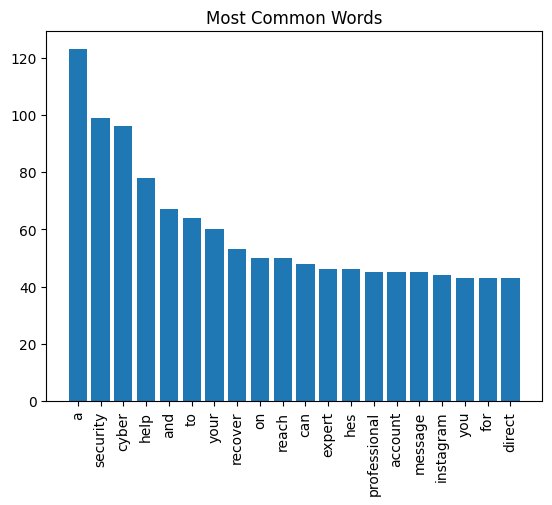

In [30]:
# visualizing the word freq
words, counts=zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Most Common Words")
plt.show()

In [31]:
from wordcloud import WordCloud

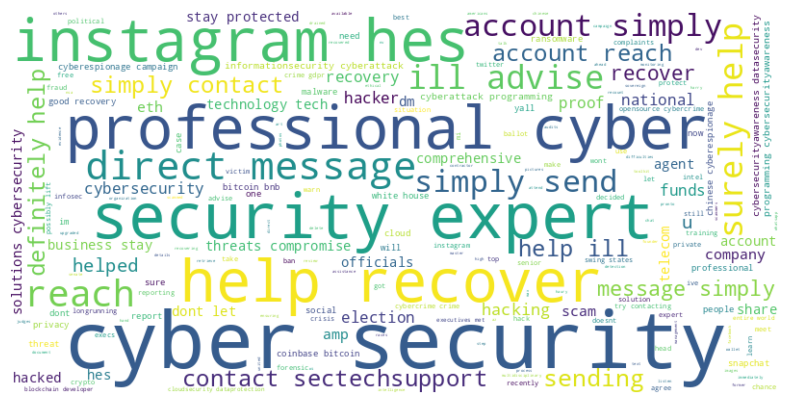

In [32]:
wordcloud = WordCloud(width=800, height = 400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [33]:
from textblob import TextBlob

In [34]:
# sentiment analysis
def analyze_sentiment(text):
  # Create a TextBlob object
  blob = TextBlob(text)
  # Get polarity score
  polarity = blob.sentiment.polarity
  # Classify sentiment
  if polarity > 0:
    sentiment = "Positive"
  elif polarity == 0:
    sentiment = "Neutral"
  else:
    sentiment = "Negative"
  return sentiment, polarity

# Apply sentiment analysis to the cleaned_text_v2 column
df[["Sentiment", "Polarity"]] = df["cleaned_text_v2"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

In [35]:
#
print('DataFrame after sentiment analysis:')
print(df[['cleaned_text_v2', 'Sentiment', 'Polarity']].head())

DataFrame after sentiment analysis:
                                     cleaned_text_v2 Sentiment  Polarity
0  you should report this case to a professional ...  Positive  0.478333
1  we are available to attend to all your cyber s...  Positive  0.200000
2  there should be a forensic review and a hand r...   Neutral  0.000000
3  cyber security needs to be upgraded pronto to ...   Neutral  0.000000
4  why not reach out to a professional cyber secu...  Positive  0.100000


In [36]:
import seaborn as sns

<ipython-input-37-0ab02f77c7e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="viridis")


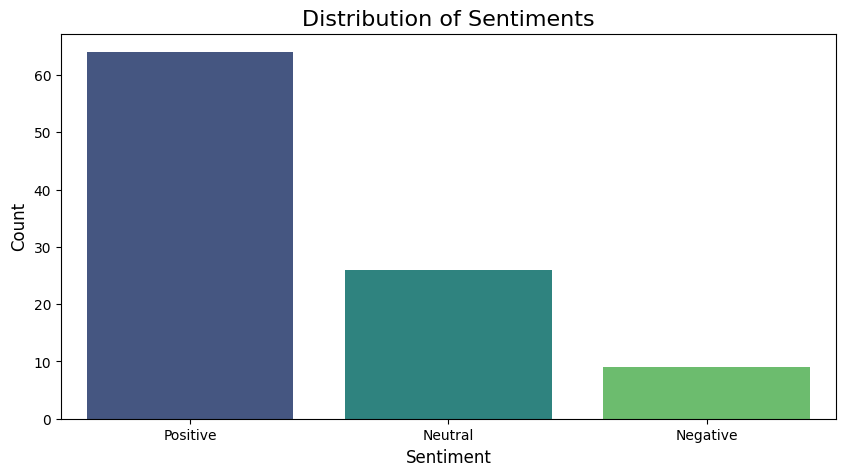

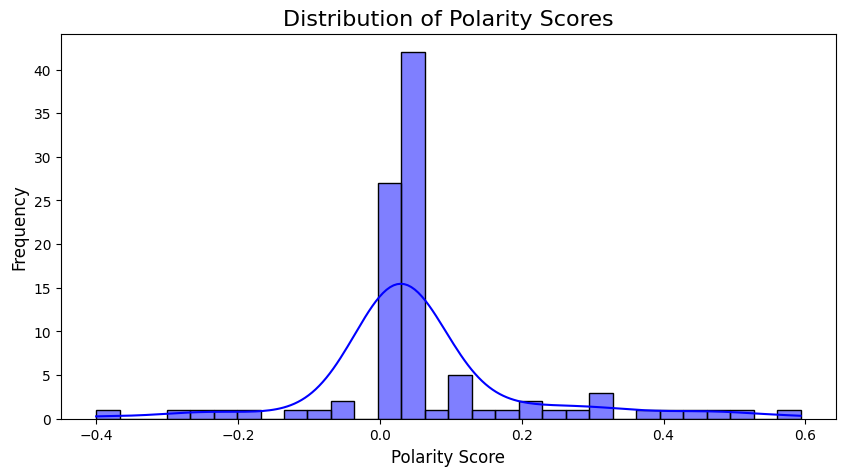

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Sentiment", palette="viridis")
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# polarity distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Polarity Scores", fontsize=16)
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Named Entity Recognition**

In [38]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [39]:
def extract_entities(text):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities
df['Entities'] = df['cleaned_text_v2'].apply(extract_entities)

In [40]:
df.duplicated(['cleaned_text_v2']).sum()

49

In [41]:
# entity type freq
from collections import Counter
# flatten list of entities
all_entities = [label for entities in df['Entities'] for _, label in entities]

In [42]:
entity_counts = Counter(all_entities)

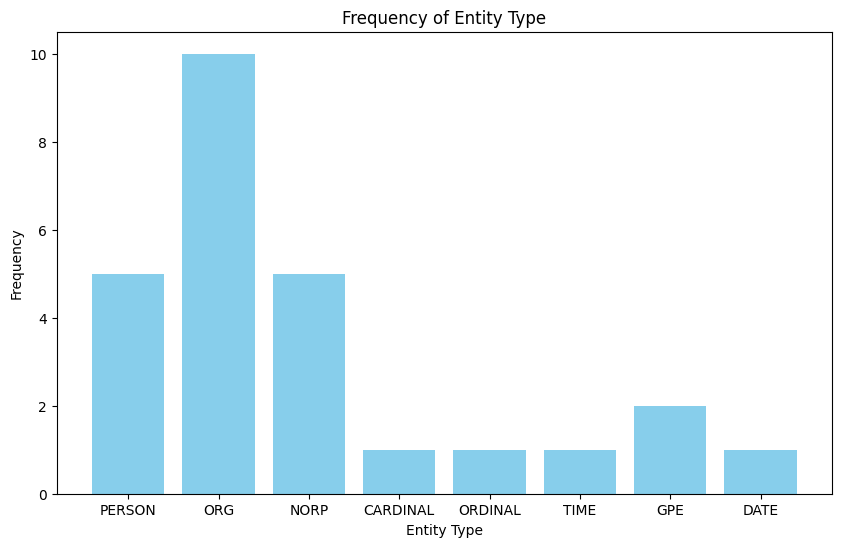

In [43]:
# ploting entities type
plt.figure(figsize=(10,6))
plt.bar(entity_counts.keys(), entity_counts.values(),color='skyblue')
plt.title('Frequency of Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()

In [44]:
# seperate column for each entity types
entity_types = ['PERSON', 'ORG', 'NORP', 'CARDINAL', 'ORDINAL', 'TIME', 'GPE', 'DATE']
for etype in entity_types:
  df[etype] = df['Entities'].apply(lambda entities: [ent for ent, label in entities if label == etype])

In [45]:
org_mentions = df[df['ORG'].apply(len)>0]
print(org_mentions[['cleaned_text_v2','ORG']])

                                      cleaned_text_v2  \
12  election fraud former nsa cyber security amp i...   
13  national security officials meet with us telec...   
29  top telecom executives met with us national se...   
43  agba akin i registered for a free cyber securi...   
54  national security officials meet with us telec...   
96  cnn reports that top telecom executives met wi...   

                           ORG  
12  [nsa, senate, az nv mi wi]  
13                     [intel]  
29           [the white house]  
43                      [agba]  
54        [intel, white house]  
96      [cnn, the white house]  


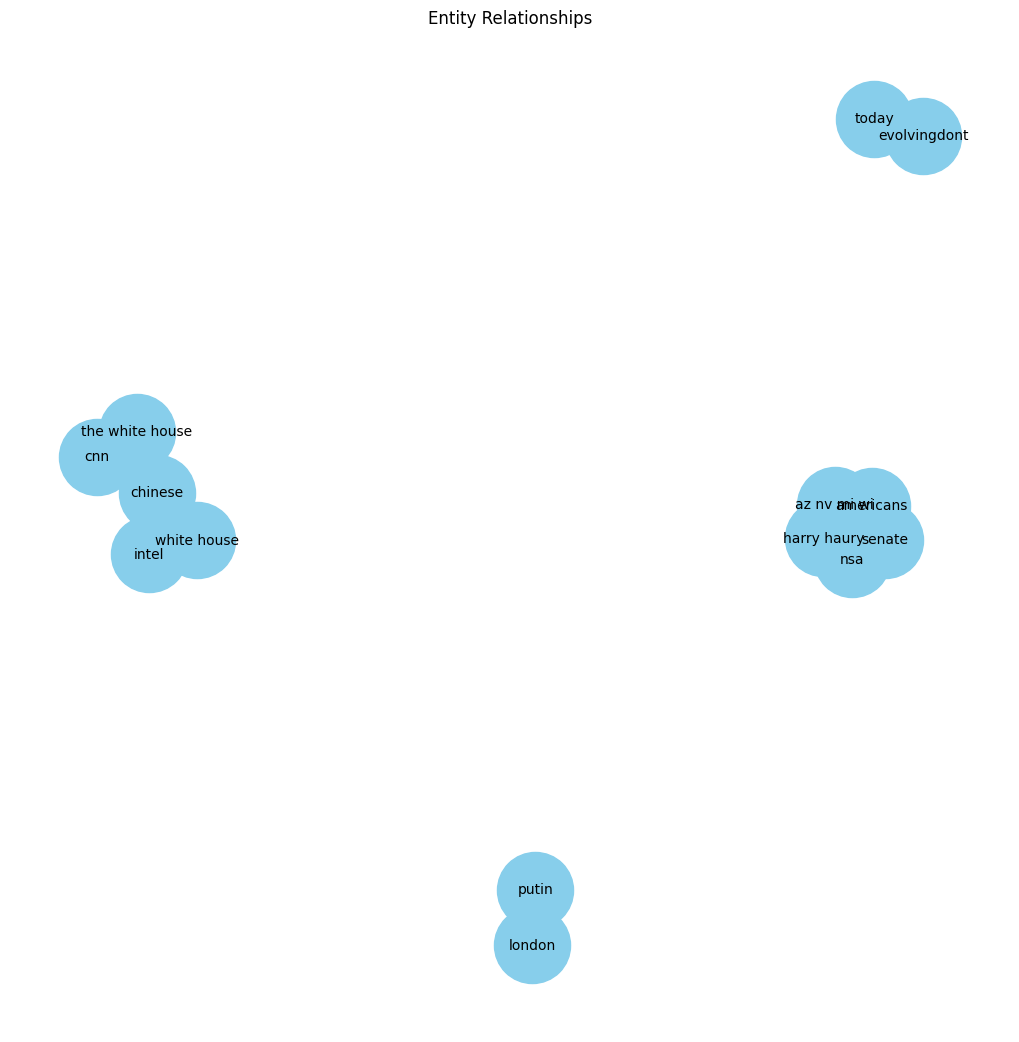

In [47]:
import networkx as nx

# create a graph
G = nx.Graph()

# adding edges for entities in each tweet
for entities in df['Entities']:
  for i in range(len(entities)):
    for j in range(i+1, len(entities)):
      G.add_edge(entities[i][0], entities[j][0])
# graph ploting
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_color='skyblue', font_size = 10, node_size=3000)
plt.title('Entity Relationships')
plt.show()